# Continuous attractor networks


### Quick description
Special kind of an attractor neural network, which in turn is a special kind of a nonlinear dynamical system. Suppose you have a population of neurons and assign to each a position on a manifold $M$. Assume the positions are uniformely sampled from $M$. Now from local excitatory connections, and global inhibitory connections, between neurons based on their distances of their associated positions on $M$. 

### Example: Ring attractor




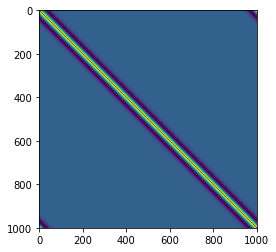

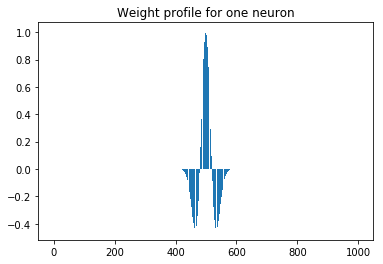

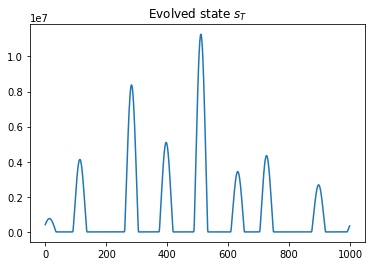

In [159]:
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML


# Number of neurons and t
# heir distances on a circle
n    = 1000


def mexican_hat1d(x, sigma=1.):
    a = 2./ ( np.sqrt(3*sigma) * np.power(np.pi,0.25 ) )
    b = (1. - (x/sigma)**2 )
    c = np.exp( - x**2/(2*sigma**2))
    return b*c





    
def evolve(s, W, b, time=500):
    dt   = 0.001
    tau  = 1.0
    S    = np.zeros((time, W.shape[1]))
    S[0] = s[:] 
    for t in range(1, time):
        ds  = dt*( np.maximum(  np.dot(W, S[t-1]) + b, 0.) - S[t-1])
        S[t,:]  = S[t-1,:] + tau*ds

    return S


x = np.linspace(-5., 5., num=n)
W = np.zeros((n,n))
for i in range(n):
#     x_ = x - x[i]
    hat = mexican_hat1d(x, sigma=.2) 
    hat = np.roll(hat, n//2)
    W[i] = np.roll(hat, i)
    



# W += 0.5
np.fill_diagonal(W, 0.0)

for i in range(n):
    W[i] -= np.mean(W[:,i])

plt.imshow(W)
plt.show()

plt.title("Weight profile for one neuron")
plt.bar(range(n),W[n//2])
plt.show()

zero = np.zeros(n)

s_zero = np.random.sample(n)
# s_zero = np.zeros(n)
b = np.zeros(n)
b[n//2:n//2+10] = 10.

T = 1000
S = evolve(s_zero, W, b, time=T)

plt.title("Evolved state $s_T$")
plt.plot( S[-1])
plt.show()

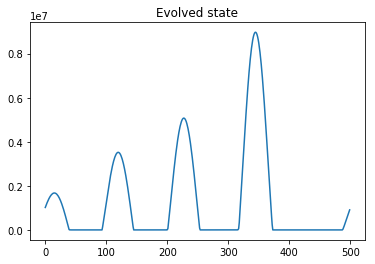

In [102]:

plt.title("Evolved state")
# plt.plot( S[-1])
# plt.plot( S[-5])
# plt.plot( S[-15])
plt.plot( S[100])
plt.show()